In [1]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import string

In [2]:
base_url = "https://www.mubawab.ma/en/st/casablanca/apartments-for-sale:o:d:p:{}"

place = []
price = []
house_info = []
number_of_pages = 142

for page_number in range(1, number_of_pages + 1):
    url = base_url.format(page_number)
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')

    # Select reviews for the current page
    house = soup.select("#mainListing .floatR , .hardShadow , .listingH3")

    print("on page ", page_number, "data scrapped is a length of:", len(house))

    for i in range(0, len(house), 4):
        # Make sure the index is within the bounds of the reviews list
        if i + 2 < len(house):
            price.append(house[i + 1].get_text(strip=True))
            house_info.append(house[i + 2].get_text(strip=True))
            place.append(house[i+3].get_text(strip=True))
        else:
            print("Warning: Skipping incomplete house info on page", page_number)

on page  1 data scrapped is a length of: 132
on page  2 data scrapped is a length of: 132
on page  3 data scrapped is a length of: 132
on page  4 data scrapped is a length of: 132
on page  5 data scrapped is a length of: 132
on page  6 data scrapped is a length of: 132
on page  7 data scrapped is a length of: 132
on page  8 data scrapped is a length of: 132
on page  9 data scrapped is a length of: 132
on page  10 data scrapped is a length of: 132
on page  11 data scrapped is a length of: 132
on page  12 data scrapped is a length of: 132
on page  13 data scrapped is a length of: 132
on page  14 data scrapped is a length of: 132
on page  15 data scrapped is a length of: 132
on page  16 data scrapped is a length of: 132
on page  17 data scrapped is a length of: 132
on page  18 data scrapped is a length of: 132
on page  19 data scrapped is a length of: 132
on page  20 data scrapped is a length of: 132
on page  21 data scrapped is a length of: 132
on page  22 data scrapped is a length of: 1

In [4]:
print(len(place))
print(len(house_info))
print(len(price))

4676
4676
4676


In [5]:
def extract_bedrooms_area(info_str):
    # Use regular expression to extract the number of bedrooms and area
    match = re.search(r'(\d+)?\s*bedrooms,\s*(\d+)?\s*m²', info_str)

    # Extract bedrooms and area or return None for missing values
    bedrooms = match.group(1) if match and match.group(1) else None
    area = match.group(2) if match and match.group(2) else None

    return bedrooms, area
bedrooms_list, area_list = zip(*[extract_bedrooms_area(info) for info in house_info])

In [33]:
data = {
    'place' : place,
    'house_price(DH)' : price,
    'bedrooms' : bedrooms_list,
    'house_area(m²)' : area_list
}
housing_Casablanca = pd.DataFrame(data)

In [34]:
housing_Casablanca.head()

,place,house_price(DH),bedrooms,house_area(m²)
0,Oulfa in\n \t\t\t\t\tCasablanca,"980,000,000 DH",3,116
1,Casablanca Marina in\n \t\t\t\t\tCasablanca,"530,000,000 DH",2,142
2,Ain Diab in\n \t\t\t\t\tCasablanca,"450,000,000 DH",3,280
3,Anfa Supérieur in\n \t\t\t\t\tCasablanca,"165,000,000 DH",3,110
4,Les Hôpitaux in\n \t\t\t\t\tCasablanca,"156,000,000 DH",2,113


In [8]:
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [9]:
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\t','',text)
    text = re.sub('casablanca', '',text)
    # text = re.sub('in' , '' ,text)
    return text

round2 = lambda x: clean_text_round2(x)

In [35]:
housing_Casablanca['place'] = housing_Casablanca['place'].apply(round1)

In [36]:
housing_Casablanca.head()

,place,house_price(DH),bedrooms,house_area(m²)
0,oulfa in\n \t\t\t\t\tcasablanca,"980,000,000 DH",3,116
1,casablanca marina in\n \t\t\t\t\tcasablanca,"530,000,000 DH",2,142
2,ain diab in\n \t\t\t\t\tcasablanca,"450,000,000 DH",3,280
3,anfa supérieur in\n \t\t\t\t\tcasablanca,"165,000,000 DH",3,110
4,les hôpitaux in\n \t\t\t\t\tcasablanca,"156,000,000 DH",2,113


In [37]:
housing_Casablanca['place'] = housing_Casablanca['place'].apply(round2)

In [38]:
housing_Casablanca.head()

,place,house_price(DH),bedrooms,house_area(m²)
0,oulfa in,"980,000,000 DH",3,116
1,marina in,"530,000,000 DH",2,142
2,ain diab in,"450,000,000 DH",3,280
3,anfa supérieur in,"165,000,000 DH",3,110
4,les hôpitaux in,"156,000,000 DH",2,113


In [39]:
housing_Casablanca['place']  = housing_Casablanca['place'].str.replace(' in ','')

In [40]:
housing_Casablanca.head()

,place,house_price(DH),bedrooms,house_area(m²)
0,oulfa,"980,000,000 DH",3,116
1,marina,"530,000,000 DH",2,142
2,ain diab,"450,000,000 DH",3,280
3,anfa supérieur,"165,000,000 DH",3,110
4,les hôpitaux,"156,000,000 DH",2,113


In [41]:
housing_Casablanca['bedrooms'] = housing_Casablanca['bedrooms'].astype(float)
housing_Casablanca['house_area(m²)'] = housing_Casablanca['house_area(m²)'].astype(float)

In [42]:
housing_Casablanca['house_price(DH)'] = pd.to_numeric(housing_Casablanca['house_price(DH)'].str.replace(',', '').str.replace(' DH', ''), errors='coerce')

In [43]:
housing_Casablanca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4676 entries, 0 to 4675
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   place            4676 non-null   object 
 1   house_price(DH)  4667 non-null   float64
 2   bedrooms         4198 non-null   float64
 3   house_area(m²)   4198 non-null   float64
dtypes: float64(3), object(1)
memory usage: 146.3+ KB


In [44]:
housing_Casablanca = housing_Casablanca.dropna()

In [45]:
housing_Casablanca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4190 entries, 0 to 4674
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   place            4190 non-null   object 
 1   house_price(DH)  4190 non-null   float64
 2   bedrooms         4190 non-null   float64
 3   house_area(m²)   4190 non-null   float64
dtypes: float64(3), object(1)
memory usage: 163.7+ KB


In [25]:
# Exploratory Data Analysis and Data visualization

In [46]:
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns

In [67]:
housing_Casablanca.head()

,place,house_price(DH),bedrooms,house_area(m²),normalized_house_price
1,marina,530000000.0,2.0,142.0,27.030503
2,ain diab,450000000.0,3.0,280.0,22.930384
3,anfa supérieur,165000000.0,3.0,110.0,8.323711
4,les hôpitaux,156000000.0,2.0,113.0,7.862448
5,les hôpitaux,140000000.0,2.0,109.0,7.042424


In [100]:
housing_Casablanca.describe()

,house_price(DH),bedrooms,house_area(m²),normalized_house_price
count,3.938000e+03,3938.000000,3938.000000,3.938000e+03
mean,2.440993e+06,2.641188,129.308024,1.443459e-17
std,1.270114e+07,0.810773,73.030683,1.000000e+00
min,3.400000e+04,2.000000,33.000000,-1.895100e-01
25%,9.500000e+05,2.000000,85.000000,-1.173904e-01
50%,1.500000e+06,3.000000,113.500000,-7.408725e-02
75%,2.400000e+06,3.000000,151.000000,-3.227466e-03
max,5.300000e+08,18.000000,1350.000000,4.153635e+01


In [87]:
house_price_mean = housing_Casablanca['house_price(DH)'].mean()
house_price_std = housing_Casablanca['house_price(DH)'].std()

In [88]:
housing_Casablanca['normalized_house_price'] = (housing_Casablanca['house_price(DH)'] - house_price_mean) / house_price_std

In [66]:
housing_Casablanca = housing_Casablanca.drop(housing_Casablanca[housing_Casablanca['place'].str.strip() == 'oulfa'].index)

In [86]:
#housing_Casablanca = housing_Casablanca.drop(housing_Casablanca[housing_Casablanca['house_area(m²)'] == 4190.0].index)
#housing_Casablanca = housing_Casablanca.drop(housing_Casablanca[housing_Casablanca['house_area(m²)'] == 4264.0].index)
#housing_Casablanca = housing_Casablanca.drop(housing_Casablanca[housing_Casablanca['house_area(m²)'] == 3939.0].index)

housing_Casablanca = housing_Casablanca.drop(housing_Casablanca[housing_Casablanca['bedrooms'] == 30.0].index)



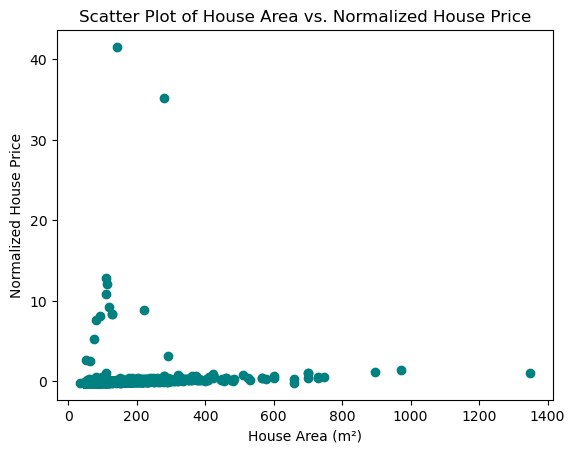

In [93]:
plt.scatter(housing_Casablanca['house_area(m²)'], housing_Casablanca['normalized_house_price'], color='teal')
plt.xlabel('House Area (m²)')
plt.ylabel('Normalized House Price')
plt.title('Scatter Plot of House Area vs. Normalized House Price')
#plt.xlim(33, 2000)

plt.show()


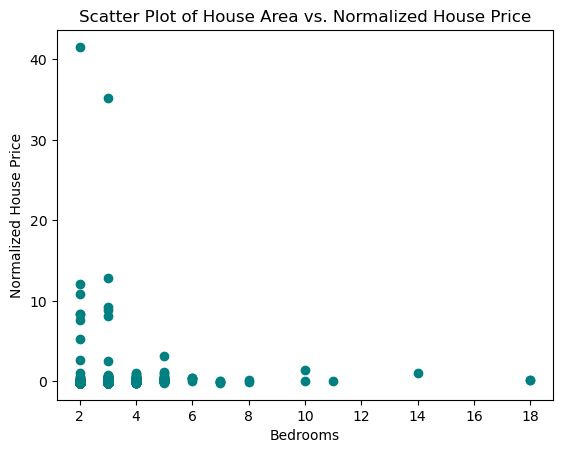

In [94]:
plt.scatter(housing_Casablanca['bedrooms'], housing_Casablanca['normalized_house_price'], color='teal')
plt.xlabel('Bedrooms')
plt.ylabel('Normalized House Price')
plt.title('Scatter Plot of House Area vs. Normalized House Price')
#plt.xlim(1, 6)

plt.show()


In [95]:
fig = px.bar(housing_Casablanca, x='place', y='normalized_house_price', color='place',
             labels={'normalized_house_price': 'Normalized House Price', 'place': 'Place'},
             title='House Price for Each Region in Casablanca')

fig.update_layout(xaxis=dict(tickangle=-45))
fig.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


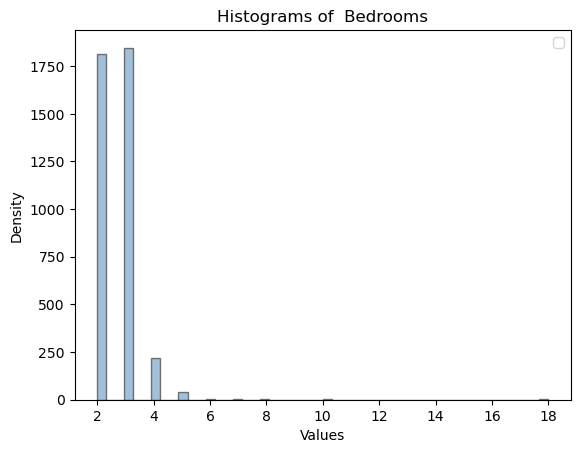

In [97]:
plt.hist(housing_Casablanca['bedrooms'], bins=50,
         alpha=0.5,
         histtype='bar',
         color='steelblue',
         edgecolor='black');
plt.legend()
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Histograms of  Bedrooms')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


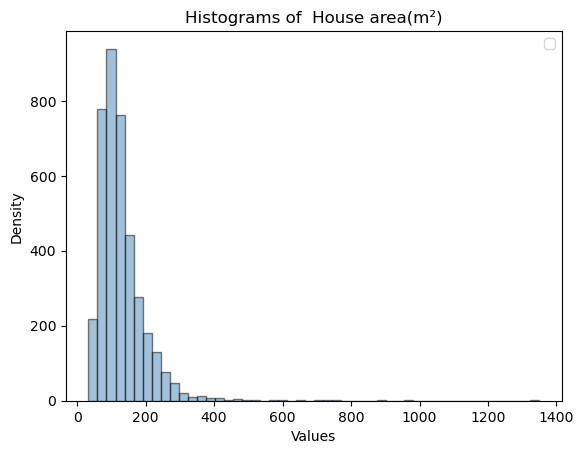

In [98]:
plt.hist(housing_Casablanca['house_area(m²)'], bins=50,
         alpha=0.5,
         histtype='bar',
         color='steelblue',
         edgecolor='black');
plt.legend()
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Histograms of  House area(m²)')
plt.show()

C:\Users\yuguerten\AppData\Local\Temp\ipykernel_27724\1698151085.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

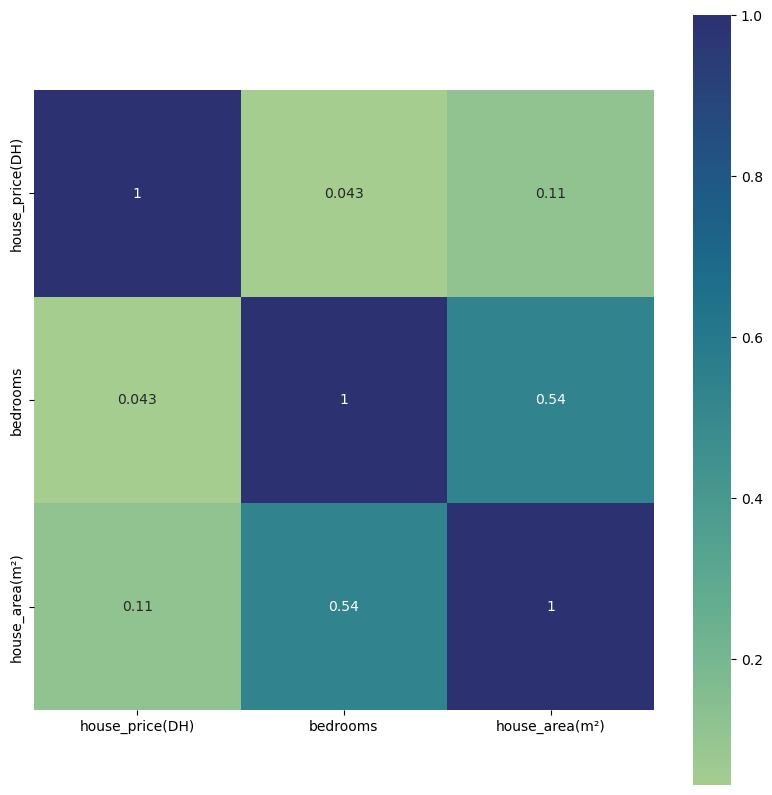

In [99]:
columns_to_exclude = ['normalized_house_price']
correlation_matrix = housing_Casablanca.drop(columns=columns_to_exclude).corr()
plt.subplots(figsize=(10,10))
sns.heatmap(correlation_matrix,cmap= "crest",annot=True,square=True, )

In [140]:
column_to_exclude = ['house_area(m²)', 'place']
training_dataset = housing_Casablanca.drop(column_to_exclude , axis = 1)
training_dataset.head()

,house_price(DH),bedrooms,normalized_house_price
1,530000000.0,2.0,41.536350
2,450000000.0,3.0,35.237703
3,165000000.0,3.0,12.798773
4,156000000.0,2.0,12.090175
5,140000000.0,2.0,10.830445


In [141]:
X = training_dataset.drop('normalized_house_price',axis ='columns')
X.head()

,house_price(DH),bedrooms
1,530000000.0,2.0
2,450000000.0,3.0
3,165000000.0,3.0
4,156000000.0,2.0
5,140000000.0,2.0


In [142]:
y = training_dataset['normalized_house_price']
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 3938 entries, 1 to 4672
Series name: normalized_house_price
Non-Null Count  Dtype  
--------------  -----  
3938 non-null   float64
dtypes: float64(1)
memory usage: 190.6 KB


In [143]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,
                                                       test_size = 0.33,
                                                       random_state = 42
                                                      )

In [144]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [145]:

#display the intercept and coefficient
print(" the intercept is " +  str(model.intercept_))
print(" the coeffiients are " +  str(model.coef_))
print(" the R_sqaured value is " +  str(model.score(X_train, y_train)))

 the intercept is -0.1921868783180439
 the coeffiients are [7.87330883e-08 3.23615262e-18]
 the R_sqaured value is 1.0


In [146]:
y_pred=model.predict(X_test)

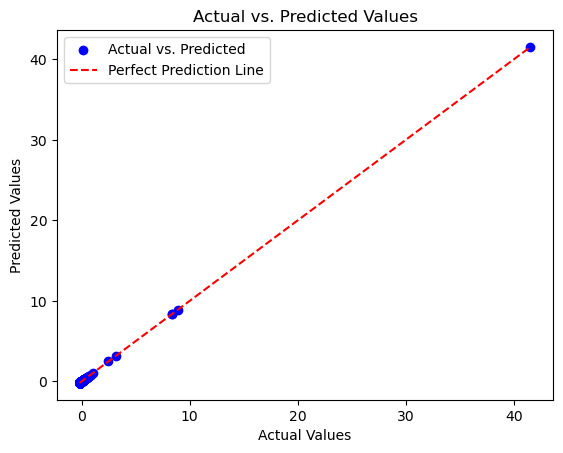

In [147]:
# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')

# Plot a 45-degree line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction Line')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [148]:
from sklearn.preprocessing import StandardScaler

# Assuming 'X' is your feature matrix
# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)



In [149]:
from sklearn.decomposition import PCA

# Specify the number of components
n_components = 2  # Choose the number of components you want

# Apply PCA
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_standardized)


In [150]:
# Print the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [0.52161109 0.47838891]


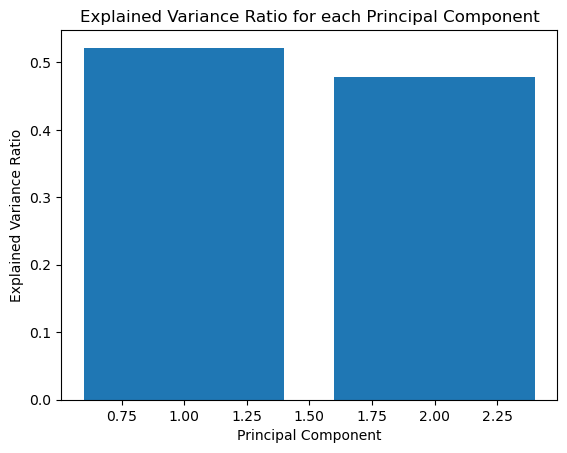

In [151]:
import matplotlib.pyplot as plt

# Plot the explained variance ratio
plt.bar(range(1, n_components + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for each Principal Component')
plt.show()

In [152]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X_pca,y,
                                                       test_size = 0.33,
                                                       random_state = 42
                                                      )

In [153]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [154]:
y_pred = model.predict(X_test)

In [155]:

#display the intercept and coefficient
print(" the intercept is " +  str(model.intercept_))
print(" the coeffiients are " +  str(model.coef_))
print(" the R_sqaured value is " +  str(model.score(X_train, y_train)))

 the intercept is -2.949029909160572e-17
 the coeffiients are [0.707017 0.707017]
 the R_sqaured value is 1.0


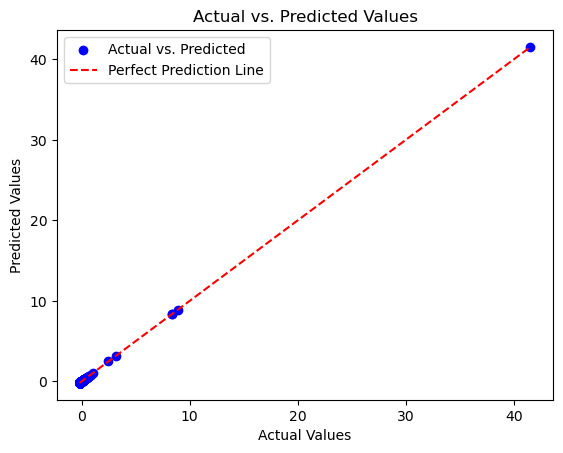

In [156]:
# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')

# Plot a 45-degree line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction Line')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [157]:
X_pca

array([[28.8150882 , 29.9336409 ],
       [25.23295616, 24.60700963],
       [ 9.36422152,  8.73827499],
       ...,
       [ 0.17973199, -0.44621454],
       [ 0.17928655, -0.44665997],
       [-0.69329714,  0.42525556]])